### Содержание:

Описание исследования<br>
Задачи исследования<br>
План исследования<br>
Описание данных<br>
Шаг 1. Подготовка данных к анализу<br>
Шаг 2. Задаём функции для расчета и анализа LTV, ROI, удержания и конверсии<br>
Шаг 3. Исследовательский анализ данных<br>
Шаг 4. Маркетинг<br>
Шаг 5. Оцените окупаемость рекламы для привлечения пользователей<br>
Шаг 6. Общие выводы<br>

### Описание исследования: 

проанализировать вложения в рекламу, оценить эффективность принимаемых маркетинговых решений для привлечения новых пользователей приложения Procrastinate Pro+.

### Задачи исследования:

- провести комплексный первичный анализ данных
- рассчитать метрики для анализа LTV, ROI,  удержания и конверсии
- провести исследовательский анализ данных
- дать оценку подходу компании к маркетинговой политике и выбранным каналам продвижения
-  оценить эффективность вложений в рекламу
- выделить причины неэффективности привлечения новых пользователей
- сформировать рекомендации для рекламного отдела

### План исследования:

- проанализировать каналы привлечения пользователей, узнать какими устройствами они пользуются 
- рассчитать стоимость привлечения новых пользователей из различных рекламных каналов
- узнать сколько денег приносит каждый клиент
- выяснить при каких условиях расходы на привлечение клиента окупаются
- выделить факторы, которые мешают привлечению клиентов
- создать пользовательские профили, определить минимальную и максимальную даты привлечения пользователей
- выявить страны, на которые приходится больше всего платящих пользователей
- выделить устройства, которыми пользуются платящие пользователи
- изучить рекламные источники привлечения платящих пользователей
- построить таблицу, отражающую количество пользователей и долю платящих пользователей для каждого канала привлечения
- описать промежуточные выводы 
- посчитать общую сумму расходов на маркетинг
- визуализировать изменения метрик во времени, выяснить, как траты распределены по источникам
- узнать среднюю стоимость привлечения одного пользователя из каждого источника
- рассчитать средний  CAC на одного пользователя для всего проекта и для каждого источника трафика
- проанализировать окупаемость рекламы
- узнать окупается ли привлечение пользователей через две недели после привлечения (на календаре 1 ноября 2019 года)
- проанализировать общую окупаемость рекламы
- простроить графики LTV, ROI, графики динамики  LTV, CAC, ROI
- проанализировать окупаемость рекламы с разбивкой по разным каналам
- проанализировать окупаемость  рекламы с разбивкой по странам
- описать обнаруженные проблемы и сделать промежуточные выводы
- построить и изучить графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам
- узнать, окупается ли реклама в целом
- выяснить, какие устройства, страны и каналы могут снижать окупаемость рекламы
- выяснить, чем могут быть вызваны проблемы окупаемости
- описать возможные причины обнаруженных проблем и подготовить рекомендации для рекламного отдела
- выделить причины неэффективности привлечения пользователей
- сформулировать рекомендации для отдела маркетинга

### Описание данных:

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

# Шаг 1. Подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt
#plt.rcParams.update({'font.size': 22})

from datetime import timedelta 
import time
import seaborn as sns

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
visits.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

In [11]:
costs.duplicated().sum()

0

In [12]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id':'user_id','session start':'session_start','session end':'session_end' })
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [13]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id':'user_id','event dt':'event_dt'})
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
costs.columns = costs.columns.str.lower()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [20]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [21]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Из таблицы “визитов” мы можем сказать, что пользователи приходят из четырёх стран: Франция (35 396), Германия (30 759), Великобритания (36 419), США (207 327).

Используемые пользователями устройства: Android (72 590), iPhone (112 603), Mac (62 022), PC (62 686).


#### Промежуточный вывод

Мы провели первичную обработку данных из документов: visits_info_short.csv, orders_info_short.csv, costs_info_short.csv. Мы импортировали необходимые библиотеки, подгрузили датасеты, после чего узнали, что файл “visits_info_short” содержит информацию о id пользователей, стране, используемом девайсе, канале привлечения, начале и конце каждой из сессий. Файл с “заказами” содержит информацию о id пользователя, дате приобретения услуги и её стоимости. В файле “costs” мы обнаружили информацию о затратах на различные рекламные платформы, а именно дату оплаты, наименование платформу, и вложенную в рекламу сумму средств. Во всех файлах отсутствуют пропуски, мы выявили, что дубликаты также отсутствуют, нам пришлось изменить названия колонок для удобства работы, приведя их к единому стилю. Колонки session_start, session_end, dt , event_dt мы преобразовали во временной формат для дальнейшего анализа. Мы выявили, какое количество пользователей приходит из различных стран, какими устройствами они пользуются, а также ознакомились со всеми каналами привлечения пользователей. <br>

**Данные готовы для дальнейшей работы.**

Из первичного анализа данных мы видим, что:

- пользователи приходят из четырёх стран: Франция (35 396), Германия (30 759), Великобритания (36 419), США (207 327).
- используют различные устройства: Android (72 590), iPhone (112 603), Mac (62 022), PC (62 686).
- пользователи приходят из различных рекламных платформ (а также, естественным образом, "organic" 107 760): TipTop (54794), FaceBoom (49022), WahooNetBanner (20465), LeapBob (17013), OppleCreativeMedia (16794),RocketSuperAds (12724), YRabbit (9053),MediaTornado (8878),AdNonSense (6891),lambdaMediaAds (6507).

# Шаг 2. Задаём функции для расчета и анализа LTV, ROI, удержания и конверсии


На этом шаге мне нужно только вставить все необходимые функции, правильно?

Беру все необходимые функции из тренажера, пытаюсь разобраться как они работают, задаю параметы observation_date и horizon_days для анализа в дальнейшем

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Исследовательский анализ данных

In [30]:
orders['revenue'].sum()

215962.88

Общая сумма доходов за период с 1 мая по 27 октября 2019 года составила 215 962.88 долларов.

In [31]:
costs_of_ads = costs.groupby('channel').agg(cost=('costs','sum')).sort_values(by='cost',ascending=False).reset_index()
costs_of_ads['%'] = (costs_of_ads['cost']/costs_of_ads['cost'].sum()*100)
costs_of_ads

,channel,cost,%
0,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
2,WahooNetBanner,5151.00,4.882589
3,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
6,LeapBob,1797.60,1.703930
7,lambdaMediaAds,1557.60,1.476436
8,MediaTornado,954.48,0.904744
9,YRabbit,944.22,0.895018


Стоимость затрат на рекламу из различных каналов привлечения пользователей: AdNonSense (3911.25), FaceBoom (32 445.60), lambdaMediaAds (1557.60), LeapBob (1797.60), MediaTornado (954.48), OppleCreativeMedia (2151.25), organic, RocketSuperAds (1833), TipTop (54 751.30), WahooNetBanner (5 151), YRabbit (944.22). 


- существенная часть затрат на рекламу вкладывается на рекламу через TipTop (54751.30) и FaceBoom (32445.60), что составляет более 80 % от общей сумму вложений в рекламу.

In [32]:
total_costs_of_ads = costs['costs'].sum()
total_costs_of_ads

105497.30000000002

- общие затраты на рекламу составили порядка 105 497 долларов

In [33]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Общее количество уникальных пользователей - 150 008 человек

In [34]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()  
print(min_analysis_date)

2019-05-01


In [35]:
print(max_analysis_date)

2019-10-27


Всё правильно, пользователи были привлечены с 1 мая по 27 октября 2019 года.

Из каких стран приходят посетители? 

Какие страны дают больше всего платящих пользователей?

In [36]:
payers_share_in_region=(profiles.groupby('region').agg(users=('user_id', 'nunique'),payers=('payer','sum'), payers_share=('payer','mean')).sort_values(by='payers_share',ascending=False).reset_index().style.format({'payers':'{:.0f}','payers_share':'{:.2%}'}))
payers_share_in_region

,region,users,payers,payers_share
0,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
3,France,17450,663,3.80%


Наибольшая удельная доля платящих пользователей приходит из США (6.9%), в Германии, Великобритании и Франции доля платящих пользователей держится на уровне 4%.

Мы видим, что большинство уникальных пользователей приходит из США (100002), за ней следуют Великобритания (17575), Франция (17450) и Германия (14981)

Наибольшее количество платящих пользователей приходит из США (6902), из остальных стран выборки приходит значительно меньше платящих пользователей, из Германии (616), Великобритании (700) и Франции (663).

Какими устройствами они пользуются? 

In [37]:
payers_share_by_device=(profiles.groupby('device').agg(users=('user_id', 'nunique'),payers=('payer','sum'), payers_share=('payer','mean')).sort_values(by='payers_share',ascending=False).reset_index().style.format({'payers':'{:.0f}','payers_share':'{:.2%}'}))
payers_share_by_device

,device,users,payers,payers_share
0,Mac,30042,1912,6.36%
1,iPhone,54479,3382,6.21%
2,Android,35032,2050,5.85%
3,PC,30455,1537,5.05%


Большинство платящих пользователей пользуются Айфонами (3382), их к этому приучили. 2050 пользователей оплачивают приложение с Андройд, 1912 с Мака и 1537 пользователей платят за услугу с ПК.

Рекламные источники привлечения платящих пользователей

In [38]:
payers_share_by_channel=(profiles.groupby('channel').agg(users=('user_id', 'nunique'),payers=('payer','sum'), payers_share=('payer','mean')).sort_values(by='payers_share',ascending=False).reset_index().style.format({'payers':'{:.0f}','payers_share':'{:.2%}'}))
payers_share_by_channel

,channel,users,payers,payers_share
0,FaceBoom,29144,3557,12.20%
1,AdNonSense,3880,440,11.34%
2,lambdaMediaAds,2149,225,10.47%
3,TipTop,19561,1878,9.60%
4,RocketSuperAds,4448,352,7.91%
5,WahooNetBanner,8553,453,5.30%
6,YRabbit,4312,165,3.83%
7,MediaTornado,4364,156,3.57%
8,LeapBob,8553,262,3.06%
9,OppleCreativeMedia,8605,233,2.71%


Наибольшее количество платящих пользователей переходит из Faceboom (3557) и TipTop (1878).

#### Промежуточные выводы

Основная проблема, которую нам удалось выделить за время проведения исследовательского анализа заключается в **несбалансированном распределении бюджета среди рекламных платформ, так как более 80% рекламного бюджета вкладывается в две платформы: FaceBoom и TipTop.**  Также, мы узнали количество уникальных пользователей из различных стран, откуда приходят платящие пользователи, какими устройствами они пользуются. Окупаются ли такие несбалансированные вложения в рекламу нам предстоит узнать во время маркетингового анализа и оценки окупаемости рекламы.

# Шаг 4. Маркетинг

Общая сумма расходов на маркетинг

In [39]:
profiles['acquisition_cost'].sum()

105497.29999999999

Как мы и выяснили ранее, общая сумма затрат на рекламу составляет 105 497 долларов.

Распределение трат по источникам

In [40]:
profiles.groupby('channel')['acquisition_cost'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
organic                   0.00
Name: acquisition_cost, dtype: float64

Наибольшие затраты приходятся на TipTop и   FaceBoom.

Визуализирую изменение метрик по времени (по месяцам)

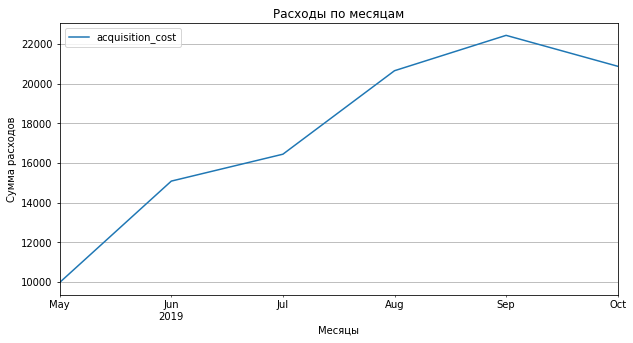

In [41]:
profiles.pivot_table(index='month', values='acquisition_cost', aggfunc='sum'
                                    ).plot(grid=True, figsize=(10, 5))
plt.title("Расходы по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Сумма расходов")
plt.show();

Как мы видим из графика, то компания только увеличивала свои затраты на реклму, которые достигли своего пика в сентябре.

Нужно ли делать разбивку по дням и неделям? (есть ли в этом смысл?)

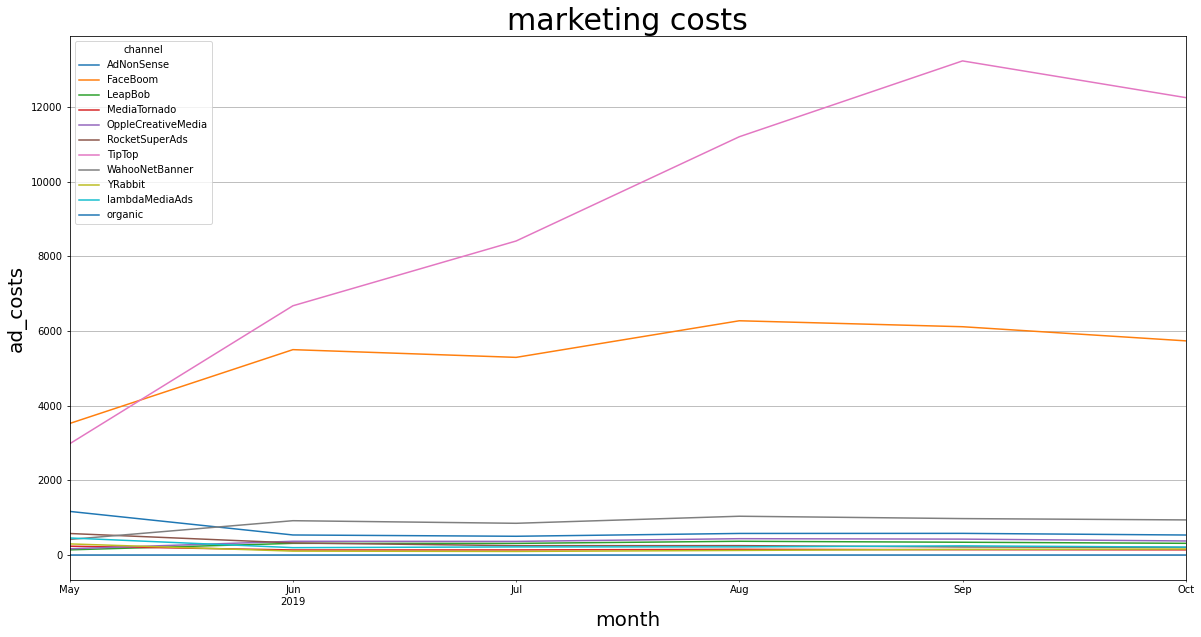

In [42]:
profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, figsize=(20, 10))
plt.title("marketing costs",fontsize=30)
plt.xlabel("month",fontsize=20)
plt.ylabel("ad_costs",fontsize=20)
plt.show();

Стоимость привлечения одного пользователя из каждого источника

Средний CAC  на одного пользователя для всего проекта

Средний CAC  на одного пользователя для каждого источника трафика

In [43]:
profiles = profiles.query('channel != "organic"')

In [44]:
cost_per_one_user = profiles
cost_per_one_user = cost_per_one_user.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
cost_per_one_user.sort_values(by = "acquisition_cost", ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [45]:
profiles['acquisition_cost'].mean()

1.1274813239427588

TipTop является наиболее дорогим источником для превлечения пользователей (2.8 доллара за  пользователя), 
привлечения c FaceBoom обходится в 1.11 долларов, 
AdNonSense (1 доллар), остальные источники обходятся дешевле 1 доллара за пользователя. 
Средняя стоимость привлечения одного пользователя по всейм источникам - 1.13 доллара.

Промежуточные выводы

- общая сумма затрат на рекламу составляет 105 497 долларов.
- Наибольшие затраты приходятся на TipTop и FaceBoom.
- компания только увеличивала свои затраты на рекламу, которые достигли своего пика в сентябре.
- TipTop является наиболее дорогим источником для привлечения пользователей (2.8 долларов за  пользователя), привлечение c FaceBoom обходится в 1.11 долларов, AdNonSense (1 доллар), остальные источники обходятся дешевле 1 доллара за пользователя. 
- Средняя стоимость привлечения одного пользователя по всем источникам - 1.13 доллара.


# Шаг 5. Оцените окупаемость рекламы

In [46]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14  

Стоит ли включать в анализ органический трафик?

Думаю, что его не стоит включить в анализ.

In [47]:
profiles['dt'] = pd.to_datetime(profiles['dt']).dt.date

Анализирую общую окупаемость рекламы используя графики LTV, ROI, CAC (на календаре 1 ноября 2019 года)

Строю графики LTV, ROI

Графики динамики LTV, CAC, ROI

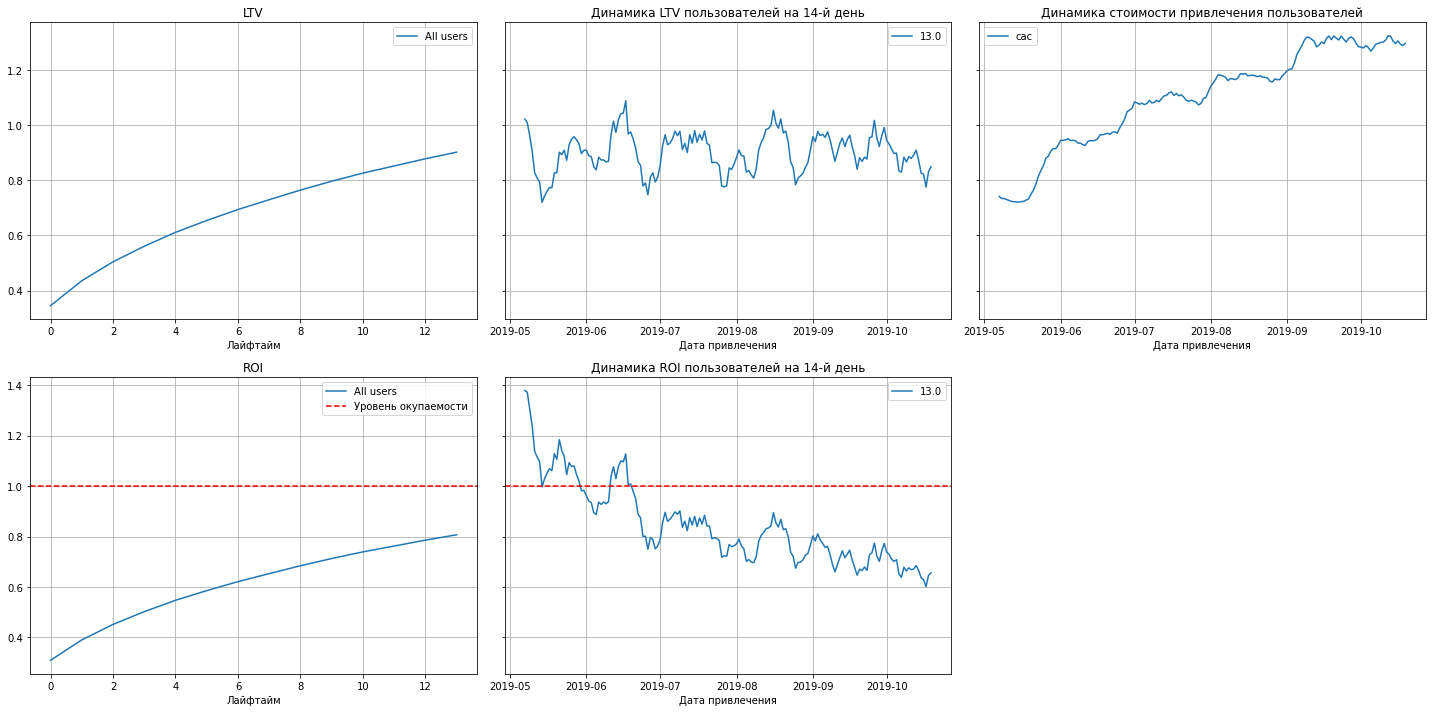

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Какие выводы можно сделать из этих графиков?

- Начиная с середины июня вложения в рекламу перестали окупаться
- стоимость превлечения пользователей постоянно растёт

Анализирую окупаемость рекламы с разбивкой по рекламным каналам (LTV, ROI | динамика: LTV, CAC, ROI)

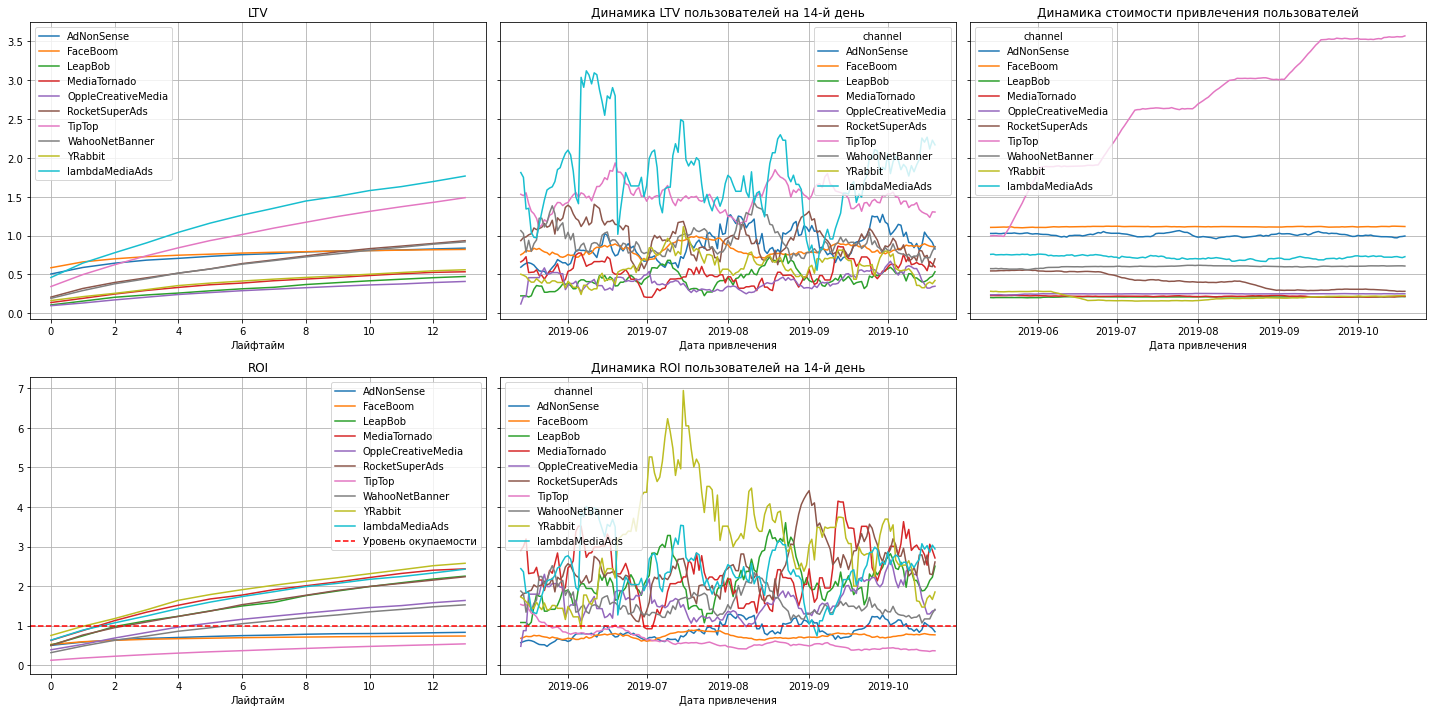

In [49]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мне трудно делать выводы по этим графикам. Заметно, что стоимость привлечения пользователей через TipTop сильно возросла за отчётный период, реклама через FaceBoom, AdnonSense, TipTop не окупается. 

Что здесь ещё можно увидеть?

Анализирую окупаемость рекламы с разбивкой по странам (LTV, ROI | динамика: LTV, CAC, ROI)

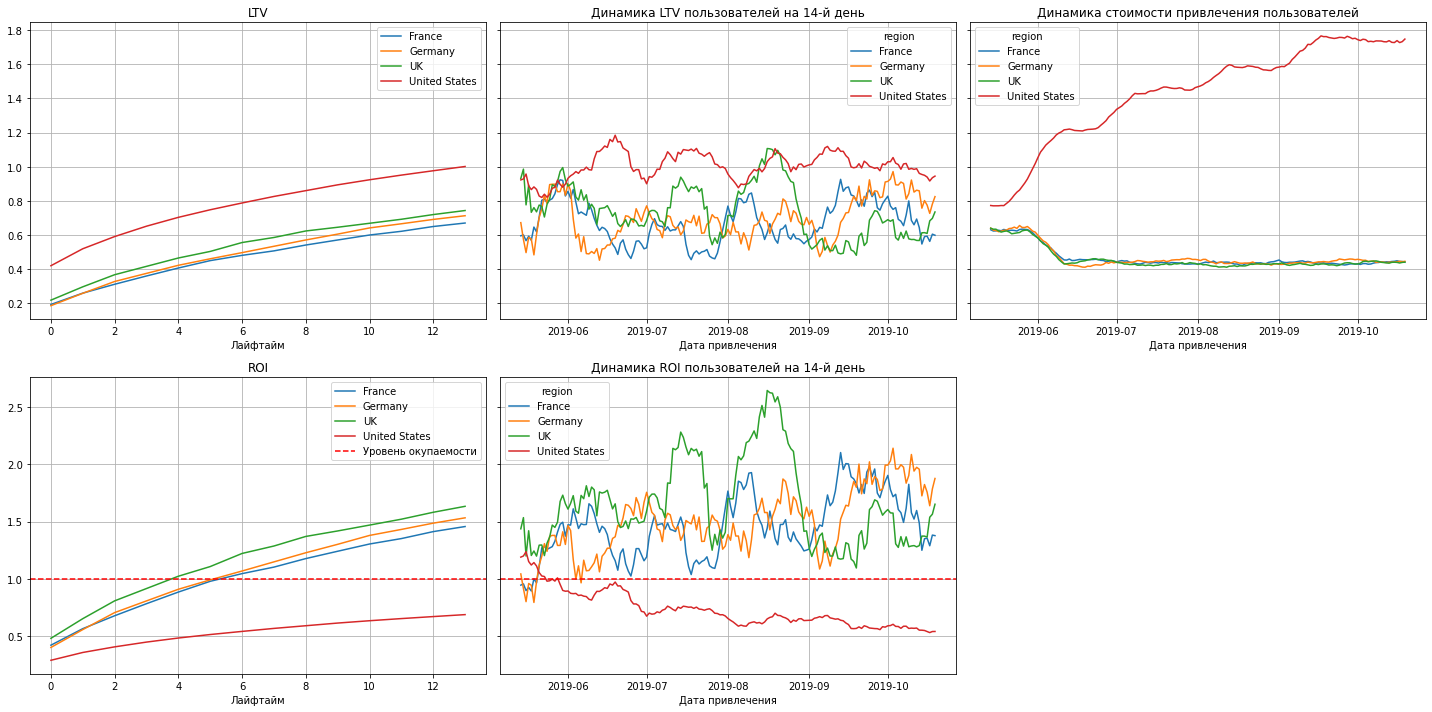

In [50]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вложения в рекламу в США обходятся всё дороже, при этом данные вложения не окупаются. 

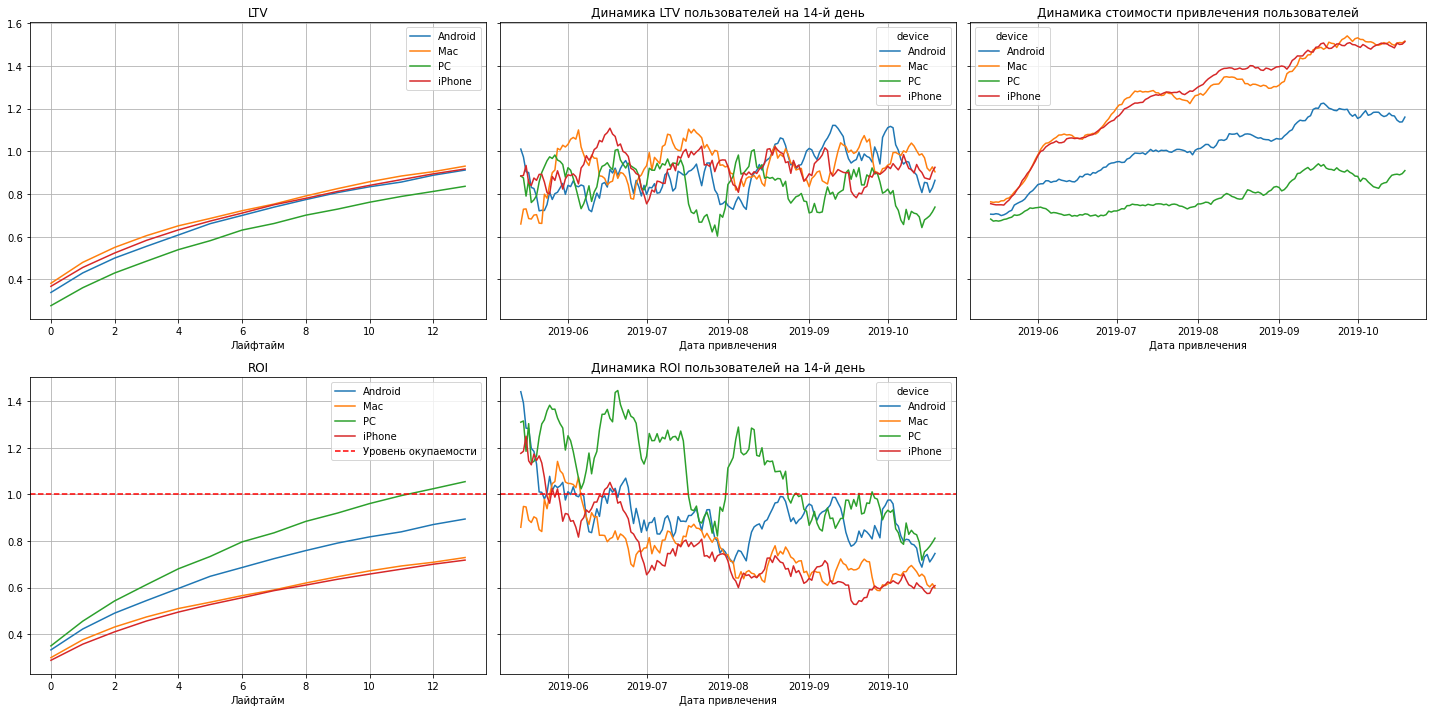

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков мы видим, что окупаются вложения в реклму только для пользователей, которые пользуются ПК. При этом, вложения в рекламу, ориентированные на пользователей Айфон и МАК возрастают, а их окупаемость только падает.

График конверсии с разбивкой по устройствам

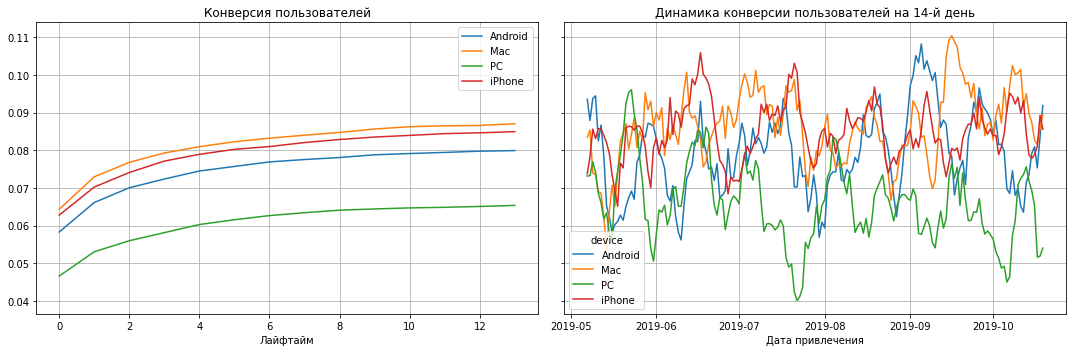

In [52]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Не понимаю как делать выводы по данным графикам. (Пользователи, которые просмотрели рекламу на МАК чаще покупают услуги, в отличие от пользователей, которые пользуются ПК?)

А что можно понять из динамики конверсии за 14 дней?

График удержания с разбивкой по устройствам

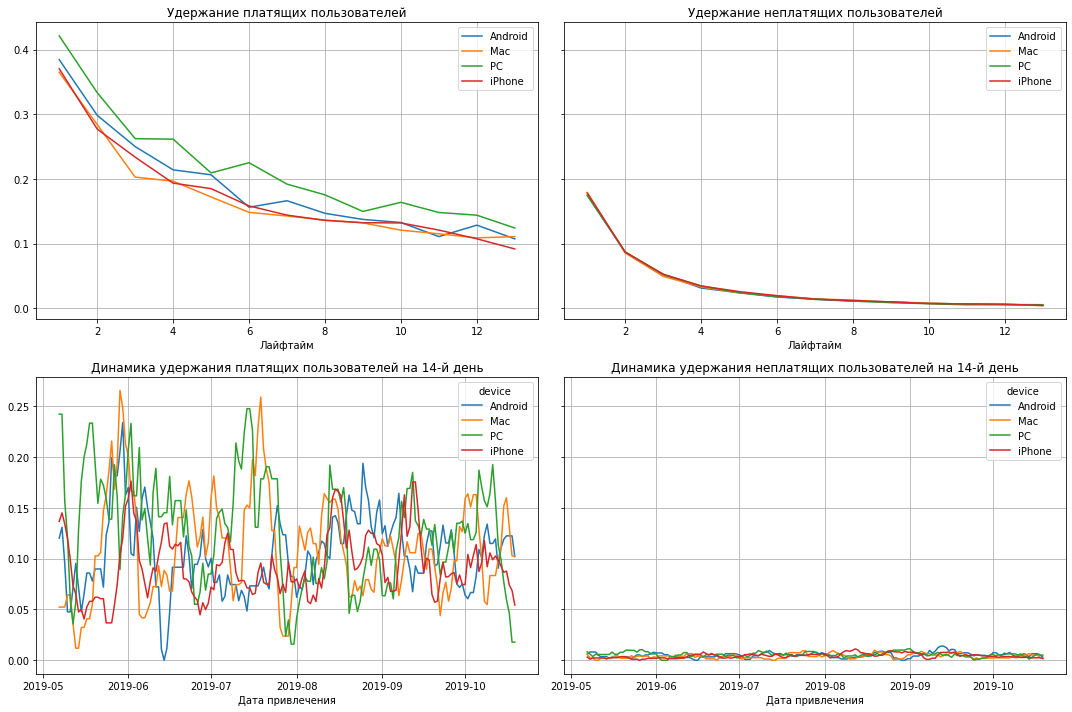

In [53]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

удержание пользователей в зависимости от устройства различается незначительно. Пользователи Айфонов с большей лёгкостью отказываются от оплаты приложения.

График конверсии с разбивкой по странам

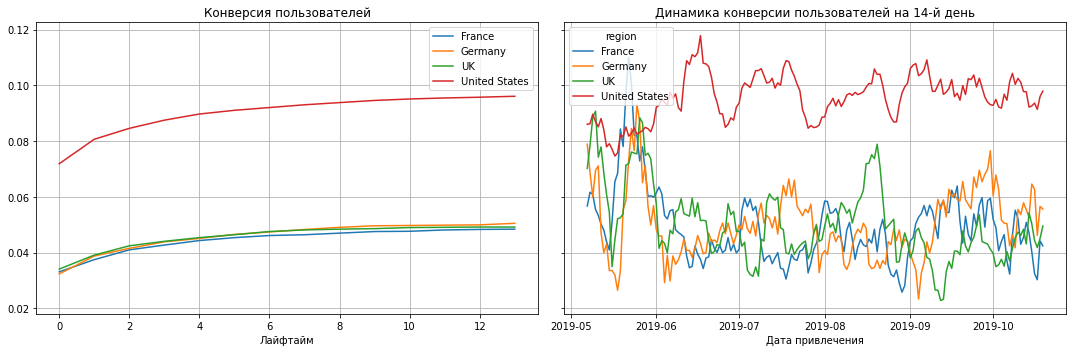

In [54]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США конвертируются хорошо. Пользователи из других стран не так активно реагируют на рекламу.

График удержания с разбивкой по странам

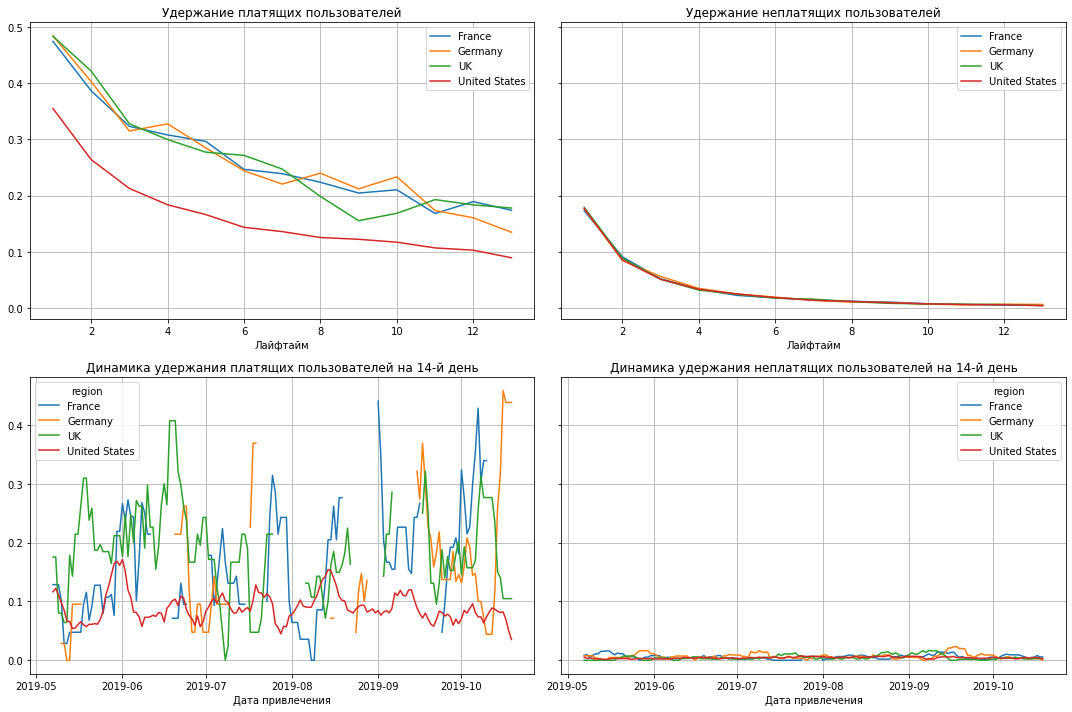

In [55]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Заметно, что удержание пользователей из США ниже, чем в других странах.

График конверсии с разбивкой по рекламным каналам

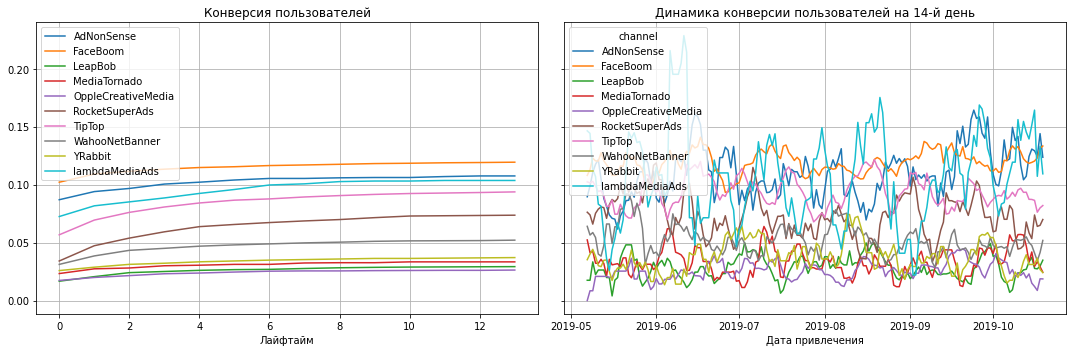

In [56]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наиболее высокая конверсия происходит с платформ FaceBoom, AdNonSense, lambdaMediaAds.

График удержания с разбивкой по рекламным каналам

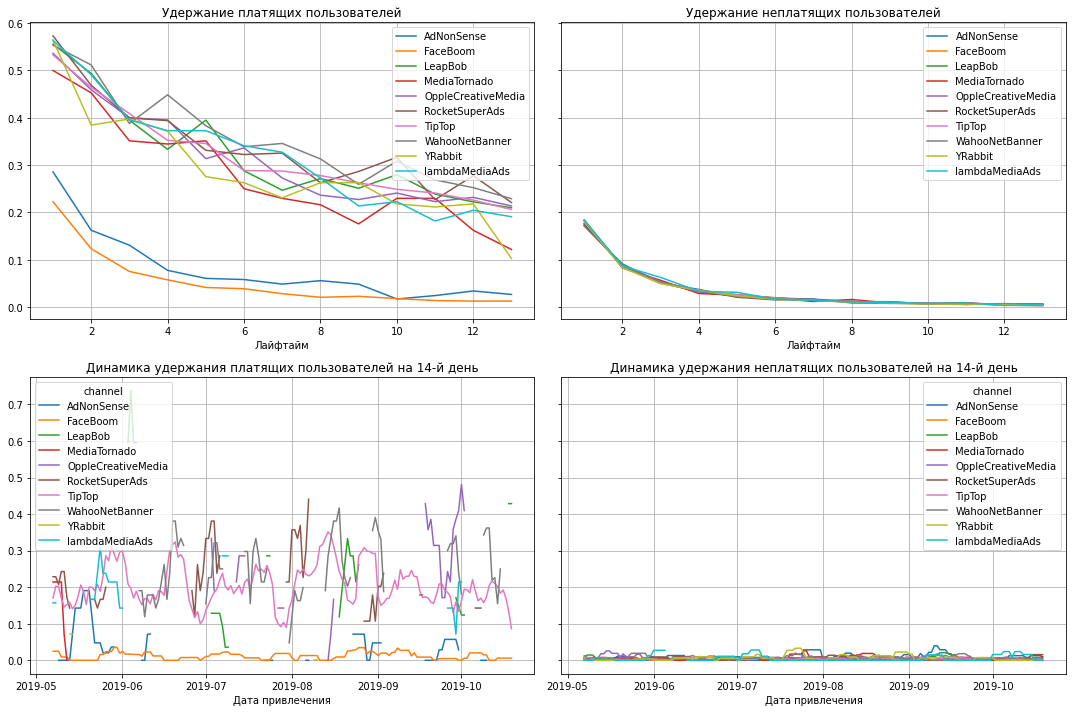

In [57]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пльзователей, которые пришли с платформ FaceBoom и AdNonSense значительно ниже.

Описываю обнаруженные проблемы и делаю промежуточные выводы

Основная проблема заключается в том, что ресурсы компании вкладываются в рекламные платформы с высокой средней стоимостью привлечения пользователей, при том, что удержание пользователей в итоге низкое.

Окупается ли реклама в целом?

Существенная доля вложений в рекламу не окупается.

Какие устройства, страны и каналы могут снижать окупаемость рекламы?

Мы выяснили, что удержание не зависит от устройства, которым пользуется человек, нужно пересмотреть расходы на рекламу (особенно обратить внимание на вложения в Faceboom и tiptop)

Чем могут быть вызваны проблемы окупаемости?

проблемы окупаемости вызваны тем, что платформы, в которые вкладывается масса средств показывают низкую степень удержания платящих пользователей, при таком неграмотном распределении ресурсов данный тренд продолжится. Вложения в маркетинг необходимо пересмотреть. 

Возможные причины обнаруженных проблем:

- ошибки руководства
- иллюзорные представления относительно того, какая реклама работает, а какая нет
- недостаток опыта в продвижении своего продукта (приложения)

Промежуточные рекомендации для рекламного отдела:

В следствии проведенного анализа были сформированы следующие рекомендации для отдела маркетинга:
- перераспределить бюджет вложений в рекламу, при этом стоит обратить внимание на следующие платформы: YRabbit, MediaTornado, lambdaMediaArts.
- перестать тратить такую львиную долю ресурсов на FaceBoom и TipTop (особенно, учитывая, что вложения в них не окупаются)
- обращать особое внимание на цифры (а именно, на уровень окупаемости, конверсии и удержания пользователей) во время выбора рекламных платформ.

# Шаг 6. Общие выводы

Изначально мы провели первичную обработку данных из документов: visits_info_short.csv, orders_info_short.csv, costs_info_short.csv. Мы импортировали необходимые библиотеки, подгрузили датасеты, после чего узнали, что файл “visits_info_short” содержит информацию о id пользователей, стране, используемом девайсе, канале привлечения, начале и конце каждой из сессий. Файл с “заказами” содержит информацию о id пользователя, дате приобретения услуги и её стоимости. В файле “costs” мы обнаружили информацию о затратах на различные рекламные платформы, а именно дату оплаты, наименование платформу, и вложенную в рекламу сумму средств. Во всех файлах отсутствуют пропуски, мы выявили, что дубликаты также отсутствуют, нам пришлось изменить названия колонок для удобства работы, приведя их к единому стилю. Колонки session_start, session_end, dt , event_dt мы преобразовали во временной формат для дальнейшего анализа. Мы выявили, какое количество пользователей приходит из различных стран, какими устройствами они пользуются, а также ознакомились со всеми каналами привлечения пользователей. Данные были подготовлены для дальнейшей работы. 

Из первичного анализа мы узнали, что:
- пользователи приходят из четырёх стран: Франция (35 396), Германия (30 759), Великобритания (36 419), США (207 327).
- пользователи используют различные устройства: Android (72 590), iPhone (112 603), Mac (62 022), PC (62 686).
- пользователи приходят из различных рекламных платформ (а также, естественным образом, "organic" 107 760): TipTop (54794), FaceBoom (49022), WahooNetBanner (20465), LeapBob (17013), OppleCreativeMedia (16794),RocketSuperAds (12724), YRabbit (9053),MediaTornado (8878),AdNonSense (6891),lambdaMediaAds (6507).

За время исследовательского анализа данных нам удалось выяснить, что:
- Общее количество уникальных пользователей - 150 008 человек
- большинство уникальных пользователей приходит из США (100 002), за ней следуют Великобритания (17 575), Франция (17450) и Германия (14981)
- Наибольшее количество платящих пользователей приходит из США (6902), в Великобритании оплачивают приложение 700 пользователей, Франция (663), Германия (616).
- Общее количество платящих пользователей по всем странам - 8881
- Большинство платящих пользователей пользуются Айфонами (3382), их к этому приучили. 2050 пользователей оплачивают приложение с Андройд, 1912 с Мака и 1537 пользователей платят за услугу с ПК.
- Наибольшее количество платящих пользователей переходит из Faceboom (3557) и TipTop (1878), также значительная часть платящих пользователей пришла естественным путём (порядка 13%, возможно, по рекомендациям друзей)

Во время анализа расходов на маркетинг мы укали, что:
- общая сумма затрат на рекламу составляет 105 497 долларов.
- Наибольшие затраты приходятся на TipTop и FaceBoom.
- компания только увеличивала свои затраты на рекламу, которые достигли своего пика в сентябре.
- TipTop является наиболее дорогим источником для привлечения пользователей (2.8 долларов за пользователя), привлечение c FaceBoom обходится в 1.11 долларов, AdNonSense (1 доллар), остальные источники обходятся дешевле 1 доллара за пользователя.
Средняя стоимость привлечения одного пользователя по всем источникам - 1.13 доллара.

Во время анализа окупаемости рекламы мы решили отказаться от использования данных о пользователях, которые пришли естественным путём (“organic”). В итог, нам удалось узнать, что:
- Начиная с середины июня вложения в рекламу перестали окупаться
- стоимость привлечения пользователей постоянна росла
- стоимость привлечения пользователей через TipTop сильно возросла за отчётный период, реклама через FaceBoom, AdnonSense, TipTop не окупается.
- Вложения в рекламу в США обходятся всё дороже, при этом данные вложения не окупаются.
- окупаются вложения в реклму только для пользователей, которые пользуются ПК. При этом, вложения в рекламу, ориентированные на пользователей Айфон и МАК возрастают, а их окупаемость только падает.
- Пользователи, которые просмотрели рекламу на МАК чаще покупают услуги, в отличие от пользователей, которые пользуются ПК
- удержание пользователей в зависимости от устройства различается незначительно. Пользователи Айфонов с большей лёгкостью отказываются от оплаты приложения.
- Пользователи из США конвертируются хорошо. Пользователи из других стран не так активно реагируют на рекламу.
- удержание пользователей из США ниже, чем в других странах.
- Наиболее высокая конверсия происходит с платформ FaceBoom, AdNonSense, lambdaMediaAds.
- Удержание пльзователей, которые пришли с платформ FaceBoom и AdNonSense значительно ниже. 
- проблемы окупаемости вызваны тем, что платформы, в которые вкладывается масса средств показывают низкую степень удержания платящих пользователей, при таком неграмотном распределении ресурсов данный тренд продолжится. Вложения в маркетинг необходимо пересмотреть.   

В следствии проведенного анализа были сформированы следующие рекомендации для отдела маркетинга:
- перераспределить бюджет вложений в рекламу, при этом стоит обратить внимание на следующие платформы: YRabbit, MediaTornado, lambdaMediaArts. 
- перестать тратить такую львиную долю ресурсов на FaceBoom и TipTop (особенно, учитывая, что вложения в них не окупаются)
- обращать особое внимание на цифры (а именно, на уровень окупаемости, конверсии и удержания пользователей) во время выбора рекламных платформ.
